# LOGISTIC IS USED WHEN THERE IS DISCRETE VALUES


Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    2.Plot bar charts showing impact of employee salaries on retention
    3.Plot bar charts showing corelation between department and employee retention
    4.Now build logistic regression model using variables that were narrowed down in step 1
    Measure the accuracy of the model



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('emp.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [15]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321



    **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
    **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
    **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


In [19]:
pd.crosstab(df.salary,df.left)# Compute a simple cross tabulation of two (or more) factors. By default
#computes a frequency table of the factors unless an array of values and an
#aggregation function are passed.

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

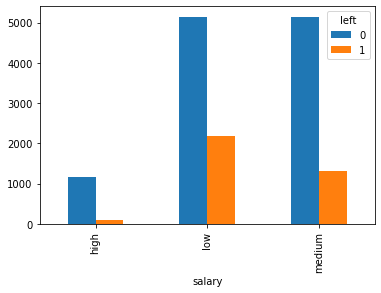

In [21]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

In [25]:
df.groupby('salary')['left'].mean() # EMPPOYEE WITH HIGH SALARY ARE NOT LIKELY TO LEAVE THE COMPANY

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

In [28]:
df.groupby('Department')['left'].mean() # BY THIS WE ARE UNABLE TO SAY ANYTHING

Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

In [29]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000




From the data analysis so far we can conclude that we will use following variables as independant variables in our model

    **Satisfaction Level**
    **Average Monthly Hours**
    **Promotion Last 5 Years**
    **Salary**



In [30]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [33]:
subdf=pd.get_dummies(subdf)
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [68]:
X=subdf.drop(columns=['salary_low'])
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [46]:
Y=df.left

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [71]:
le=LogisticRegression()

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [73]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_medium
12272,0.81,270,0,0,1
235,0.83,255,0,0,0
3995,0.63,177,0,0,1
13443,0.65,201,0,0,0
3223,0.65,249,0,0,1
...,...,...,...,...,...
11446,0.31,132,0,0,0
11881,0.66,273,0,0,0
5054,0.75,197,0,0,1
107,0.44,148,0,0,1


In [74]:
le.fit(X,Y)

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
le.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
le.score(X,Y)

0.7753183545569705

# IF WE USE LINEAR REGRESSION FOR THIS ONE

In [77]:
lin=LinearRegression()

In [78]:
lin.fit(X,Y)

LinearRegression()

In [79]:
lin.predict(X_test)

array([0.33643787, 0.11101609, 0.2763401 , ..., 0.04820367, 0.13215495,
       0.41828141])

In [80]:
lin.score(X,Y) 

0.17605757246898035

#WE GOT JUST 17% ACCURACY SO WE USE LOGISTIC FOR DISCRETE TYPE OF VALUES

# LOGISTIC(MULTICLASS)

In [16]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
digits['data'].shape #8*8 ARRAY SO 64

(1797, 64)

In [14]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

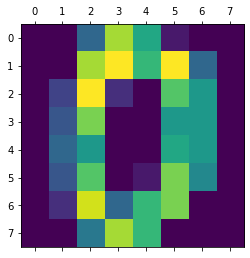

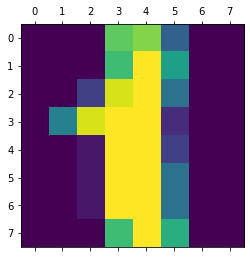

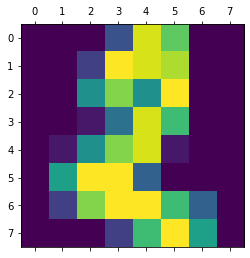

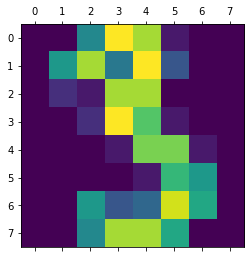

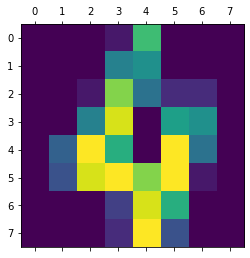

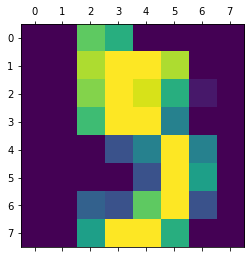

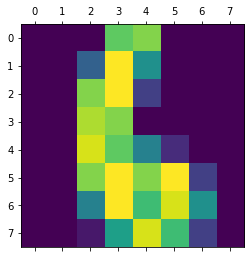

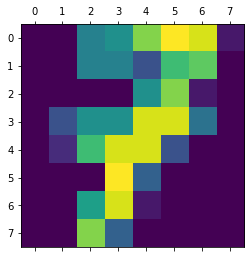

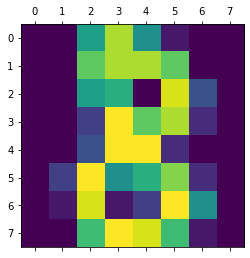

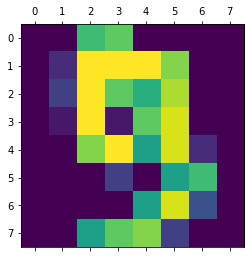

In [22]:
for i in range(0,10):
    plt.matshow(digits.images[i])            #Display an array as a matrix in a new figure window.
# 8*8 MATRIX

In [24]:
for i in range(0,10):
    print(digits.target[i])

0
1
2
3
4
5
6
7
8
9


In [26]:
X=digits.data

In [27]:
Y=digits.target

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
X_train

array([[ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  6.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 12.,  7.,  0.],
       [ 0.,  0., 12., ...,  7.,  0.,  0.],
       [ 0.,  0., 10., ..., 10.,  0.,  0.]])

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
le=LogisticRegression()

In [37]:
le.fit(X_train,Y_train)

C:\Users\Personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
le.score(X,Y) # 99% ACCURACY

0.991652754590985

In [41]:
le.predict([digits.data[67]])

array([6])

In [44]:
digits.target[67] # SAME AS PREDICTED

6